In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [36]:
data_dir ='kaggle-data/'

drivers_raw_df = pd.read_csv(f'{data_dir}/drivers.csv')
qualifying_raw_df = pd.read_csv(f'{data_dir}/qualifying.csv')
laptimes_raw_df = pd.read_csv(f'{data_dir}/lap_times.csv')
pitstops_raw_df = pd.read_csv(f'{data_dir}/pit_stops.csv')
constructor_standings_raw_df = pd.read_csv(f'{data_dir}/constructor_standings.csv')
seasons_raw_df = pd.read_csv(f'{data_dir}/seasons.csv')
circuits_raw_df = pd.read_csv(f'{data_dir}/circuits.csv')
constructors_raw_df = pd.read_csv(f'{data_dir}/constructors.csv')
driver_standings_raw_df = pd.read_csv(f'{data_dir}/driver_standings.csv')
results_raw_df = pd.read_csv(f'{data_dir}/results.csv')
status_raw_df = pd.read_csv(f'{data_dir}/status.csv')
races_raw_df = pd.read_csv(f'{data_dir}/races.csv')



In [37]:
drivers = drivers_raw_df[['driverId','forename','surname']].reset_index(drop=True)
drivers['Name'] = drivers[['forename', 'surname']].agg(' '.join, axis=1)
drivers.drop(['forename','surname'], axis=1, inplace=True)

driver_name_id_map = dict(zip(drivers['Name'], drivers['driverId']))
def get_driverID(name):
    
    return drivers.loc[drivers['Name']==name, 'driverId'].squeeze()

#drivers[drivers['Name'].str.contains('Nyck')]

In [38]:
driver_names_of_interest = ['Max Verstappen',
                           'Sergio Pérez',
                           'Lewis Hamilton',
                           'Fernando Alonso',
                           'Charles Leclerc',
                           'Lando Norris',
                           'George Russell',
                           'Oscar Piastri',
                           'Lance Stroll',
                           'Pierre Gasly',
                           'Esteban Ocon',
                           'Alexander Albon',
                           'Nico Hülkenberg',
                           'Valtteri Bottas',
                           'Guanyu Zhou',
                           'Yuki Tsunoda',
                           'Kevin Magnussen',
                           #'Liam Lawson',
                           'Logan Sargeant',
                           'Nyck de Vries',
                           'Daniel Ricciardo']
driver_ids_of_interest = [driver_name_id_map[name] for name in driver_names_of_interest]


In [45]:
races_raw_df['Date'] = pd.to_datetime(races_raw_df['date'])

laptimes_raw_df.shape[0]
laptimes = laptimes_raw_df.merge(races_raw_df[['raceId','Date']], on='raceId', how='left')
assert laptimes.shape[0] == laptimes_raw_df.shape[0], 'confirm no duplicates formed during merge'

laptimes_with_names = laptimes.merge(drivers[['driverId','Name']], on='driverId', how='left')
assert laptimes.shape[0] == laptimes_with_names.shape[0], 'confirm no duplicates formed during merge'


laptime_di = laptimes_with_names[laptimes_with_names['Name'].isin(driver_names_of_interest)].reset_index(drop=True)
assert laptime_di['driverId'].nunique() == len(driver_ids_of_interest), 'confirm we have lap data for all drivers of interest'

laptime_di = laptime_di.sort_values(['raceId','lap','driverId'])

laptime_di = laptime_di.merge(results_raw_df[['raceId','driverId','statusId']], on=['raceId','driverId'])
laptime_di = laptime_di.merge(status_raw_df[['statusId','status']], on=['statusId'])



In [46]:
laptime_di[['raceId','driverId','status']].groupby('raceId')[['status']].nunique()

,status
raceId,
1,2
2,2
3,1
4,1
5,2
...,...
1106,4
1107,3
1108,4


In [42]:
laptime_di

,raceId,driverId,lap,position,time,milliseconds,Date,Name,statusId
0,1,1,1,13,1:49.088,109088,2009-03-29,Lewis Hamilton,2
1,1,1,2,12,1:33.740,93740,2009-03-29,Lewis Hamilton,2
2,1,1,3,11,1:31.600,91600,2009-03-29,Lewis Hamilton,2
3,1,1,4,10,1:31.067,91067,2009-03-29,Lewis Hamilton,2
4,1,1,5,10,1:32.129,92129,2009-03-29,Lewis Hamilton,2
...,...,...,...,...,...,...,...,...,...
151582,1088,852,39,10,1:17.362,77362,2022-09-04,Yuki Tsunoda,24
151583,1088,852,40,10,1:17.462,77462,2022-09-04,Yuki Tsunoda,24
151584,1088,852,41,10,1:17.276,77276,2022-09-04,Yuki Tsunoda,24
151585,1088,852,42,11,1:20.208,80208,2022-09-04,Yuki Tsunoda,24


<AxesSubplot:xlabel='lap', ylabel='Count'>

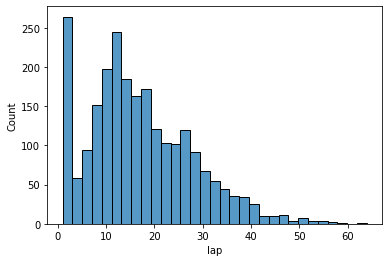

In [32]:
first_pitstop = pitstops_raw_df[pitstops_raw_df['stop']==1].reset_index(drop=True)
drivers = laptime_di[['raceId','driverId','Name']].drop_duplicates()

x = first_pitstop.merge(drivers, on=['raceId','driverId'])
sns.histplot(x, x='lap')

<AxesSubplot:xlabel='Name', ylabel='lap'>

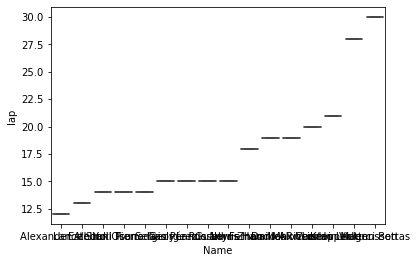

In [34]:
x = x[x['raceId']==1096]

sns.boxplot(data=x, x='Name',y='lap')

In [27]:
x['lap'].min()

1

In [219]:
print('number of races:', laptime_di['raceId'].nunique())

number of races: 409


In [220]:
laptime_di

,raceId,driverId,lap,position,time,milliseconds,Date,Name
0,841,1,1,2,1:40.573,100573,2011-03-27,Lewis Hamilton
1,841,1,2,2,1:33.774,93774,2011-03-27,Lewis Hamilton
2,841,1,3,2,1:32.900,92900,2011-03-27,Lewis Hamilton
3,841,1,4,2,1:32.582,92582,2011-03-27,Lewis Hamilton
4,841,1,5,2,1:32.471,92471,2011-03-27,Lewis Hamilton
...,...,...,...,...,...,...,...,...
151582,1110,817,40,17,1:54.361,114361,2023-07-30,Daniel Ricciardo
151583,1110,817,41,17,1:53.367,113367,2023-07-30,Daniel Ricciardo
151584,1110,817,42,16,1:55.247,115247,2023-07-30,Daniel Ricciardo
151585,1110,817,43,16,1:52.115,112115,2023-07-30,Daniel Ricciardo


In [221]:
# check if drivers have the same number of laps per race, for all races
n_laps_race = laptime_di.groupby(['raceId','driverId'])['lap'].max().reset_index(name='# laps')
assert (n_laps_race.groupby(['raceId','driverId'])['# laps'].max() == n_laps_race.groupby(['raceId','driverId'])['# laps'].min()).sum() / len(n_laps_race.groupby(['raceId','driverId'])['# laps'].max()) == 1
del n_laps_race

In [223]:
def graph_race(raceId):
    
    sns.lineplot(data=laptime_di[laptime_di['raceId']==1106], x='lap',y='milliseconds',hue='Name')

In [212]:
idx = (laptime_di.groupby(['raceId'])['driverId'].nunique() >= 19).sum()
idx
#laptime_di.loc[idx]

10

In [201]:
laptime_di['Date'].dtype

dtype('<M8[ns]')

In [182]:
(n_laps_race.groupby(['raceId','driverId'])['# laps'].max() == n_laps_race.groupby(['raceId','driverId'])['# laps'].min()).sum()

2716

In [183]:
len(n_laps_race.groupby(['raceId','driverId'])['# laps'].max())

2716

In [184]:
laptime_di.groupby(['raceId','driverId']).size().idxmin()

(881, 4)

In [213]:
n_laps_race.groupby(['raceId','driverId'])['# laps'].max().size()[0]

NameError: name 'n_laps_race' is not defined